In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , confusion_matrix
import skimage
import matplotlib.pyplot as plt
import joblib
from PIL import Image, ImageOps

In [2]:
image_train=np.load("E:/1-Collage/3-Senior-2/CV/Project/data_set/image_train.npy")
label_train=np.load("E:/1-Collage/3-Senior-2/CV/Project/data_set/label_train.npy")
image_test=np.load("E:/1-Collage/3-Senior-2/CV/Project/data_set/image_test.npy")
label_test=np.load("E:/1-Collage/3-Senior-2/CV/Project/data_set/label_test.npy")

In [53]:
def confusion_image(label_test, y_test_pred, cutoff=1):

    # Step 1: Compute the confusion matrix
    cm = confusion_matrix(label_test, y_test_pred)
    
    # Step 2: Normalize the confusion matrix to range [0, 255]
    cm_normalized = (cm / cm.max()) * 255
    cm_image = Image.fromarray(cm_normalized.astype('uint8'))
    
    # Step 3: Apply contrast stretching
    cm_image = ImageOps.autocontrast(cm_image, cutoff=cutoff)
    
    # Step 4: Plot the confusion matrix
    plt.imshow(cm_image, cmap='gray')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.axis('off')
    plt.show()
    
    # Step 5: Calculate and return accuracy
    accuracy = (cm.diagonal().sum()) / cm.sum()
    print("Accuracy:", accuracy)

In [4]:
def extract_hog_features(images):
    hog = cv.HOGDescriptor(
        _winSize=(100, 100),  # Window size matches the input image size
        _blockSize=(20, 20),  # Block size
        _blockStride=(10, 10),  # Block stride
        _cellSize=(10, 10),  # Cell size
        _nbins=9  # Number of bins
    )
    
    hog_features = []
    for image in images:
        image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
        feature = hog.compute(image)
        hog_features.append(feature.flatten()) 
    
    return np.array(hog_features)

# Compute confusion matrix





In [5]:
hog_features_train= extract_hog_features(image_train)
hog_features_test = extract_hog_features(image_test)

data=np.concatenate((hog_features_train,hog_features_test),axis=0)
mean=np.mean(data,axis=0)
std=np.std(data,axis=0)

hog_features_train=(hog_features_train-mean)/std
hog_features_test=(hog_features_test-mean)/std

svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(hog_features_train, label_train)
joblib.dump(svm_model, 'svm_model.pkl')

In [6]:
svm_model = joblib.load('svm_model.pkl')

In [7]:
y_test_pred_SVM = svm_model.predict(hog_features_test)

In [8]:
print("Test Accuracy:", accuracy_score(label_test, y_test_pred_SVM))

Test Accuracy: 0.9118082899360684


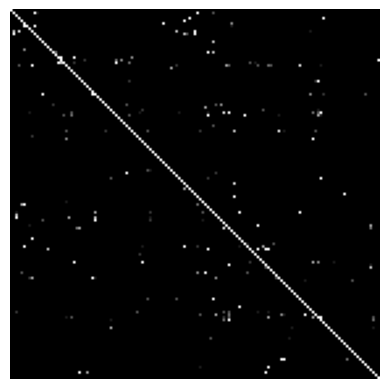

Accuracy: 0.9118082899360684


In [54]:
confusion_image(label_test, y_test_pred_SVM)

In [59]:
from sklearn.neighbors import KNeighborsClassifier

# Create and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(hog_features_train, label_train)

# Predict the labels for the test set
y_test_pred_KNN = knn_model.predict(hog_features_test)

# Evaluate the model
KNN_accuracy = accuracy_score(label_test, y_test_pred_KNN)
print("KNN Test Accuracy:", KNN_accuracy)

KNN Test Accuracy: 0.8853042042423472


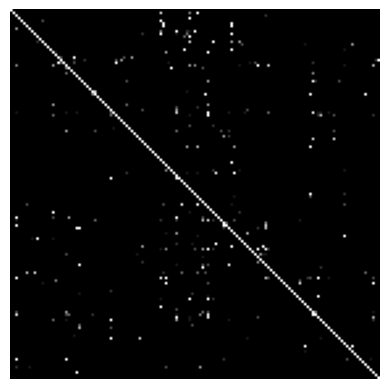

Accuracy: 0.8853042042423472


In [61]:
confusion_image(label_test, y_test_pred_KNN)

In [19]:
def calculate_cluster_labels(clusters_labels, label, k):
    cluster_labels = np.empty(k, dtype=object)  # Use dtype=object for non-numeric labels

    for i in range(k):
        cluster_indices = np.where(clusters_labels == i)[0]
        true_labels = label[cluster_indices].flatten()

        if len(true_labels) > 0: 
            unique_labels, counts = np.unique(true_labels, return_counts=True)
            cluster_labels[i] = unique_labels[np.argmax(counts)]

    # Map each data point's cluster to its corresponding label
    predicted_labels = np.array([cluster_labels[label] for label in clusters_labels])

    # Calculate accuracy
    accuracy = np.mean(predicted_labels.flatten() == label.flatten())
    
    return cluster_labels, predicted_labels, accuracy


In [20]:
from sklearn.cluster import KMeans

hog_features=np.concatenate((hog_features_train,hog_features_test),axis=0)
label=np.concatenate((label_train,label_test),axis=0)

k = 141  

kmeans_model = KMeans(n_clusters=k, random_state=42)
kmeans_model.fit(hog_features)

# Predict the cluster labels for the training and test data
clusters_labels = kmeans_model.predict(hog_features)

# Calculate cluster labels and accuracy for training data
y_pred_K_mean, train_predicted_labels, K_mean_accuracy = calculate_cluster_labels(clusters_labels, label, k)
print("KMeans Training Accuracy:", K_mean_accuracy)


KMeans Training Accuracy: 0.4189459143555414


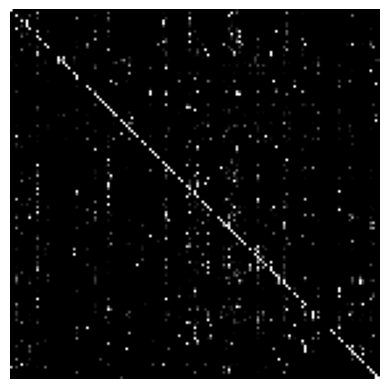

Accuracy: 0.4189459143555414


In [56]:
confusion_image(label, train_predicted_labels)

True Label: Apple Braeburn 1
SVM Predicted Label: Nectarine 1
KNN Predicted Label: Limes 1
K_means Predicted Label: Passion Fruit 1


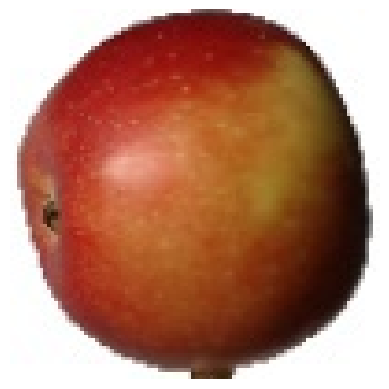

True Label: Ginger Root 1
SVM Predicted Label: Ginger Root 1
KNN Predicted Label: Ginger Root 1
K_means Predicted Label: Corn 1


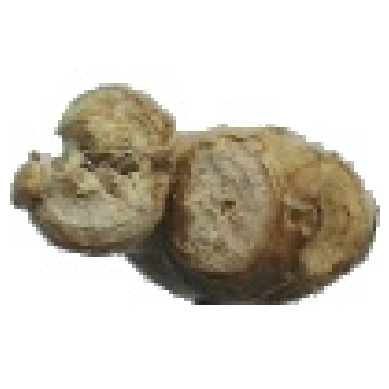

True Label: Plum 3
SVM Predicted Label: Plum 3
KNN Predicted Label: Plum 3
K_means Predicted Label: Plum 3


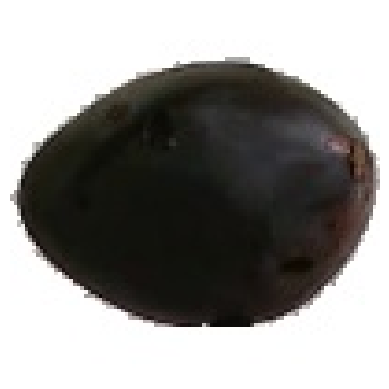

True Label: Grapefruit White 1
SVM Predicted Label: Grapefruit White 1
KNN Predicted Label: Grapefruit White 1
K_means Predicted Label: Grapefruit White 1


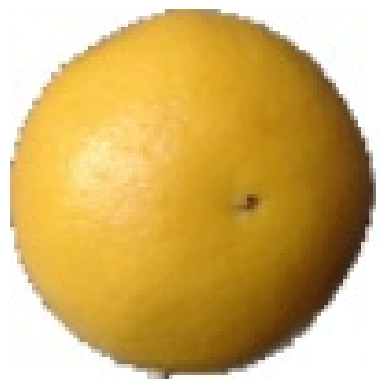

True Label: Avocado ripe 1
SVM Predicted Label: Avocado ripe 1
KNN Predicted Label: Avocado ripe 1
K_means Predicted Label: Melon Piel de Sapo 1


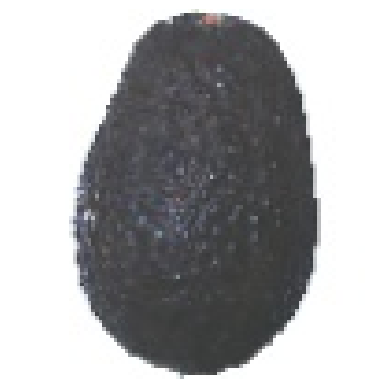

True Label: Limes 1
SVM Predicted Label: Lemon 1
KNN Predicted Label: Limes 1
K_means Predicted Label: Clementine 1


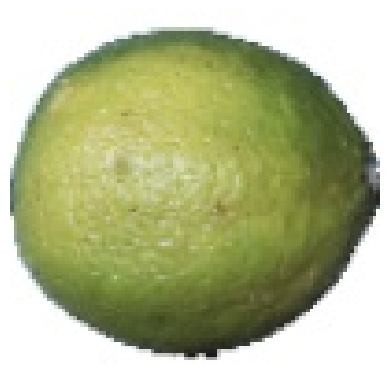

True Label: Pear Red 1
SVM Predicted Label: Pear Red 1
KNN Predicted Label: Pear Red 1
K_means Predicted Label: Mangostan 1


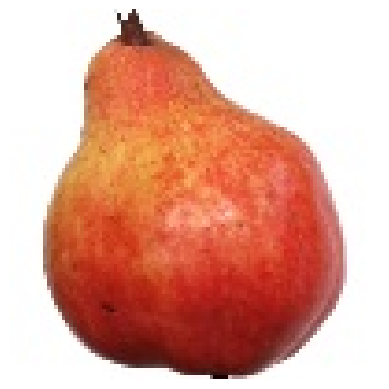

True Label: Apple Golden 2
SVM Predicted Label: Lemon 1
KNN Predicted Label: Grapefruit Pink 1
K_means Predicted Label: Orange 1


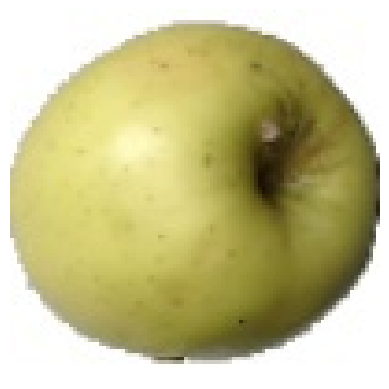

True Label: Plum 3
SVM Predicted Label: Plum 3
KNN Predicted Label: Plum 3
K_means Predicted Label: Plum 3


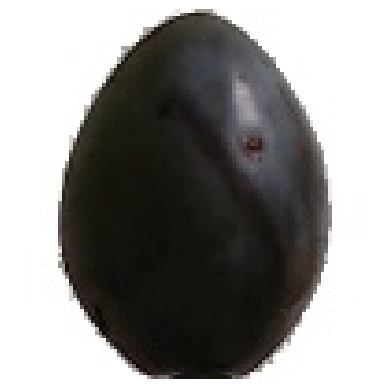

True Label: Pear Forelle 1
SVM Predicted Label: Pear Forelle 1
KNN Predicted Label: Pear Forelle 1
K_means Predicted Label: Onion White 1


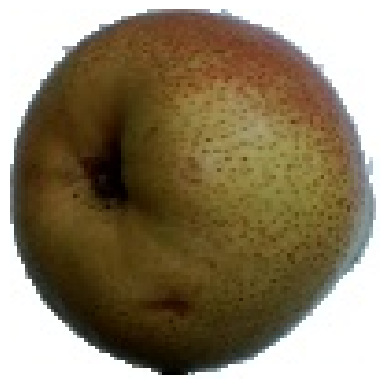

In [62]:
random_array = np.random.randint(0, 20000, size=10)
random_array

for i in range(len(random_array)):
    plt.imshow(image_test[random_array[i],:,:,::-1])
    print("True Label:", label_test[random_array[i]])
    print("SVM Predicted Label:", y_test_pred_SVM[random_array[i]])
    print("KNN Predicted Label:", y_test_pred_KNN[random_array[i]])
    print("K_means Predicted Label:", train_predicted_labels[random_array[i]+70491])
    plt.axis('off')
    plt.show()